# Practice Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt

## Q1

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X = X.to_numpy()
y = y.to_numpy()
X.shape

(70000, 784)

In [14]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
n = 49000

X_train, X_test, y_train, y_test = X[:n], X[n:], y[:n], y[n:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False, random_state=42)

In [15]:
y_train

array(['5', '0', '4', ..., '8', '3', '6'], dtype=object)

## Q2

In [16]:
X_train_6, X_train_9, y_train_6, y_train_9 = X_train[np.where(y_train=='6')[0]], X_train[np.where(y_train=='9')[0]], y_train[np.where(y_train=='6')[0]], y_train[np.where(y_train=='9')[0]],
X_train_6, X_train_9, y_train_6, y_train_9 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['6', '6', '6', ..., '6', '6', '6'], dtype=object),
 array(['9', '9', '9', ..., '9', '9', '9'], dtype=object))

In [17]:
# stack X6 on X9 and y6 on y9
X_train_69, y_train_69 = np.vstack((X_train_6, X_train_9)), np.hstack((y_train_6, y_train_9))
len(X_train_69), len(y_train_69), len(X_train_6), len(X_train_9)

(9746, 9746, 4855, 4891)

In [18]:
# change labels
y_train_69_01 = np.zeros((len(y_train_69)))
y_train_69_01[np.where(y_train_69 == '6')] = 1

In [19]:
y_train_69 = y_train_69_01
np.sum(np.array(y_train_69, dtype='int64'))

4855

In [20]:
len(X_train_69), len(y_train_69), len(X_train_6), len(X_train_9)

(9746, 9746, 4855, 4891)

In [21]:
from sklearn.utils import shuffle

X_train_69, y_train_69 = shuffle(X_train_69, y_train_69, random_state=1729)

## Q3

In [22]:
X_test_6, X_test_9, y_test_6, y_test_9 = X_test[np.where(y_test=='6')[0]], X_test[np.where(y_test=='9')[0]], y_test[np.where(y_test=='6')[0]], y_test[np.where(y_test=='9')[0]],
X_test_6, X_test_9, y_test_6, y_test_9 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['6', '6', '6', ..., '6', '6', '6'], dtype=object),
 array(['9', '9', '9', ..., '9', '9', '9'], dtype=object))

In [23]:
# stack X6 on X9 and y6 on y9
X_test_69, y_test_69 = np.vstack((X_test_6, X_test_9)), np.hstack((y_test_6, y_test_9))
len(X_test_69), len(y_test_69), len(X_test_6), len(X_test_9)

(4088, 4088, 2021, 2067)

In [24]:
# change labels
y_test_69_01 = np.zeros((len(y_test_69)))
y_test_69_01[np.where(y_test_69 == '6')] = 1

In [25]:
y_test_69 = y_test_69_01
np.sum(np.array(y_test_69, dtype='int64'))

2021

## Q4

In [26]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
X_train_69Tf = std_sclr.fit_transform(X_train_69)

In [27]:
X_train_69Tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
np.mean(X_train_69Tf[0,:]), np.mean(X_train_69Tf[:,0]), np.std(X_train_69Tf[0]), np.std(X_train_69Tf[:,0])

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)

## Q5

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss

### A

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

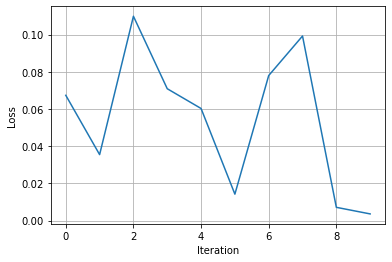

In [30]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,
    learning_rate='constant',
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 10

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### B

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

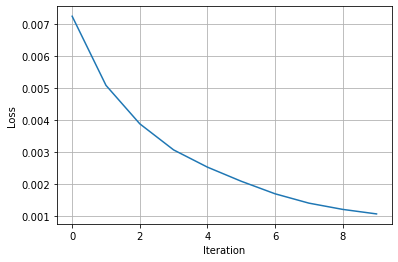

In [31]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.000001,
    alpha=0,
    learning_rate='constant',
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 10

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

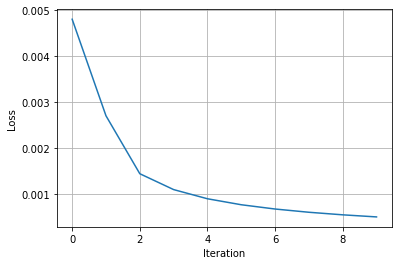

In [32]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,
    learning_rate='constant',
    random_state=10
)

pipe_sgd = make_pipeline(StandardScaler(), estimator)
loss = []
iterations = 10

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

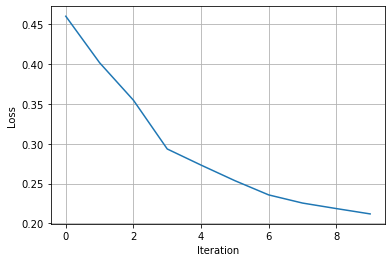

In [33]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,
    learning_rate='invscaling',
    power_t=1.0,
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 10

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Graded Assignment

## Q1

### A

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

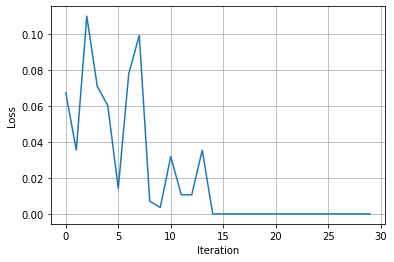

[9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16, 9.992007221626413e-16]


In [34]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,                    # Ensures no regularization
    learning_rate='constant',   
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 30

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))
#     print(i, log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
print(loss[14:])

### B

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

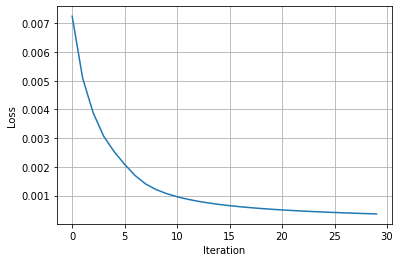

[0.0006910160424148383, 0.0006479844819053854, 0.0006106097192106593, 0.0005778052874544815, 0.000548744110070308, 0.0005227876161284454, 0.0004994361579121374, 0.0004782937811400405, 0.00045904287631653117, 0.0004414257338849452, 0.0004252309780366272, 0.0004102834821327007, 0.0003964367919859222, 0.00038356737243918395, 0.0003715701921308012, 0.0003603552999312769]


In [35]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.000001,
    alpha=0,                    # Ensures no regularization
    learning_rate='constant',
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 30

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
print(loss[14:])


### C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

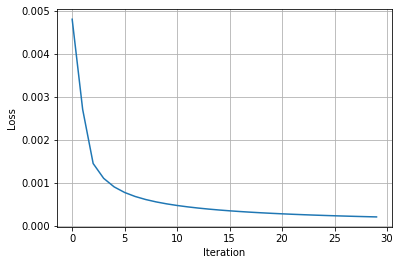

[0.0004123573087315128, 0.00038821598932356754, 0.0003669568787513016, 0.0003480731624056522, 0.00033117313461423776, 0.0003159487259120318, 0.00030215395116812543, 0.00028958977570283956, 0.0002780932538300991, 0.00026752958306474744, 0.00025778619195589934, 0.000248768274013528, 0.00024039536784039515, 0.00023259870600270794, 0.00022531913674945857, 0.00021850547809506828, 0.0002121132020642346, 0.00020610337377097905]


In [36]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,                    # Ensures no regularization
    learning_rate='constant',    
    random_state=10
)

pipe_sgd = make_pipeline(StandardScaler(), estimator)
loss = []
iterations = 30

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
print(loss[12:])

### D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

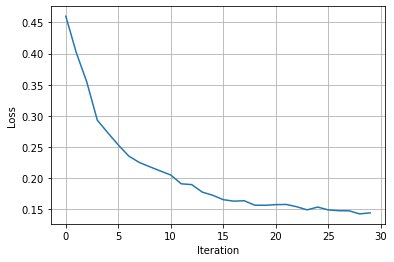

[0.1898778085425935, 0.17788896091536022, 0.17279611620762117, 0.1657431537079199, 0.16333107885435677, 0.16402115265750977, 0.15686919764043927, 0.15674672919765004, 0.15777477221834063, 0.15807708958347855, 0.1543956520676736, 0.14940273005253177, 0.15388204861764834, 0.149333708072587, 0.14806668711099066, 0.14786390325551627, 0.14287521476918985, 0.1445887466531177]


In [37]:
estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    eta0=0.01,
    alpha=0,                    # Ensures no regularization
    learning_rate='invscaling',
    power_t=1.0,
    random_state=10
)

pipe_sgd = make_pipeline(estimator)
loss = []
iterations = 30

for i in range(iterations):
    pipe_sgd.fit(X_train_69, y_train_69)
    y_pred = pipe_sgd.predict_proba(X_train_69)
    loss.append(log_loss(y_train_69, y_pred))

plt.figure()
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
print(loss[12:])

### Q3

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss

estimator = SGDClassifier(
    loss='log',
    penalty='l2',
    max_iter=10,
    warm_start=False,
    eta0=0.5,
    alpha=0,                    # Ensures no regularization
    learning_rate='invscaling',
    power_t=0.5,
    random_state=10,
    shuffle=True
)

pipe_sgd = make_pipeline(estimator)
loss = []
# iterations = 10
pipe_sgd.fit(X_train_69, y_train_69)
y_pred = pipe_sgd.predict_proba(X_train_69)

# for i in range(iterations):
#     pipe_sgd.fit(X_train_69, y_train_69)
#     y_pred = pipe_sgd.predict_proba(X_train_69)
#     loss.append(log_loss(y_train_69, y_pred))

# plt.figure()
# plt.plot(np.arange(iterations), loss)
# plt.grid(True)
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()
# print(loss[12:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


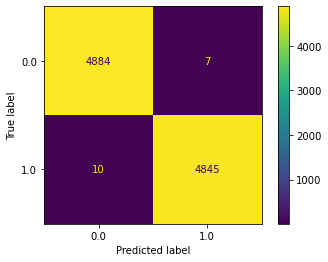

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

y_hat = pipe_sgd.predict(X_train_69)
cm_disp = ConfusionMatrixDisplay.from_predictions(y_train_69, y_hat, values_format='.5g')

## Q4

In [54]:
ind_fp = np.logical_and(y_train_69==0, y_hat==1)
X_fp = X_train_69[ind_fp]

for i in range(len(ind_fp)):
    if ind_fp[i]:
        print(i)

2167
2407
3036
3368
4217
5556
6230


C:\Program Files\KMSpico\temp\ipykernel_18816\1858160727.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


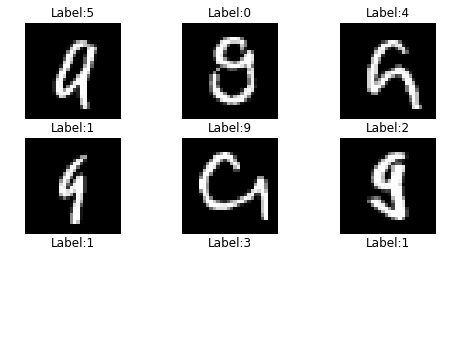

In [57]:
# verify selections

num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"

for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor):
        if index+j < 7 and i < 2:
            ax[i, j].imshow(X_fp[index+j].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i, j].set_axis_off()

## Q5

In [247]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer = TfidfVectorizer()
data_vector = tfid_vectorizer.fit_transform(data.data)
data_vector.shape

(11314, 130107)

## Q6

In [256]:
X = data_vector
y = data.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [257]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [263]:
mnb.score(X_test, y_test)

0.8427098674521355